<a href="https://colab.research.google.com/github/rawanalshammari3/2025_GP_11/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Anxiety..xlsx')
df1= pd.DataFrame(df)

### Statistical summary
We compute summary statistics (mean, std, min, max, quartiles) for numeric features.

In [ ]:
print(df1.describe())
print(df1.describe(include=['object']))

       Academic_Anxiety_Level   Academic_Worry_Level  \
count              2028.000000           2028.000000   
mean                  1.778107              1.634122   
std                   0.952277              1.027620   
min                   0.000000              0.000000   
25%                   1.000000              1.000000   
50%                   2.000000              2.000000   
75%                   3.000000              3.000000   
max                   3.000000              3.000000   

       Relaxation_Difficulty_Level  Academic_Irritation_Level  \
count                  2028.000000                2028.000000   
mean                      1.754438                   1.782544   
std                       0.996221                   0.965386   
min                       0.000000                   0.000000   
25%                       1.000000                   1.000000   
50%                       2.000000                   2.000000   
75%                       3.000000      

In [ ]:
missing=df.isna().sum()
print("The Missing Values in each column:")
print(missing)
print("\n Total Number Of Missing Values In The Dataset:",null_values.sum())

The Missing Values in each column:
1. Age                         0
2. Gender                      0
3. University                  0
4. Department                  0
5. Academic Year               0
6. Current CGPA                0
7. Scholarship                 0
Academic_Anxiety_Level         0
Academic_Worry_Level           0
Relaxation_Difficulty_Level    0
Academic_Irritation_Level      0
Excessive_Worry_Level          0
Academic_Restlessness_Level    0
Fear_Level                     0
Anxiety Value                  0
Anxiety Label                  0
dtype: int64

 Total Number Of Missing Values In The Dataset: 0


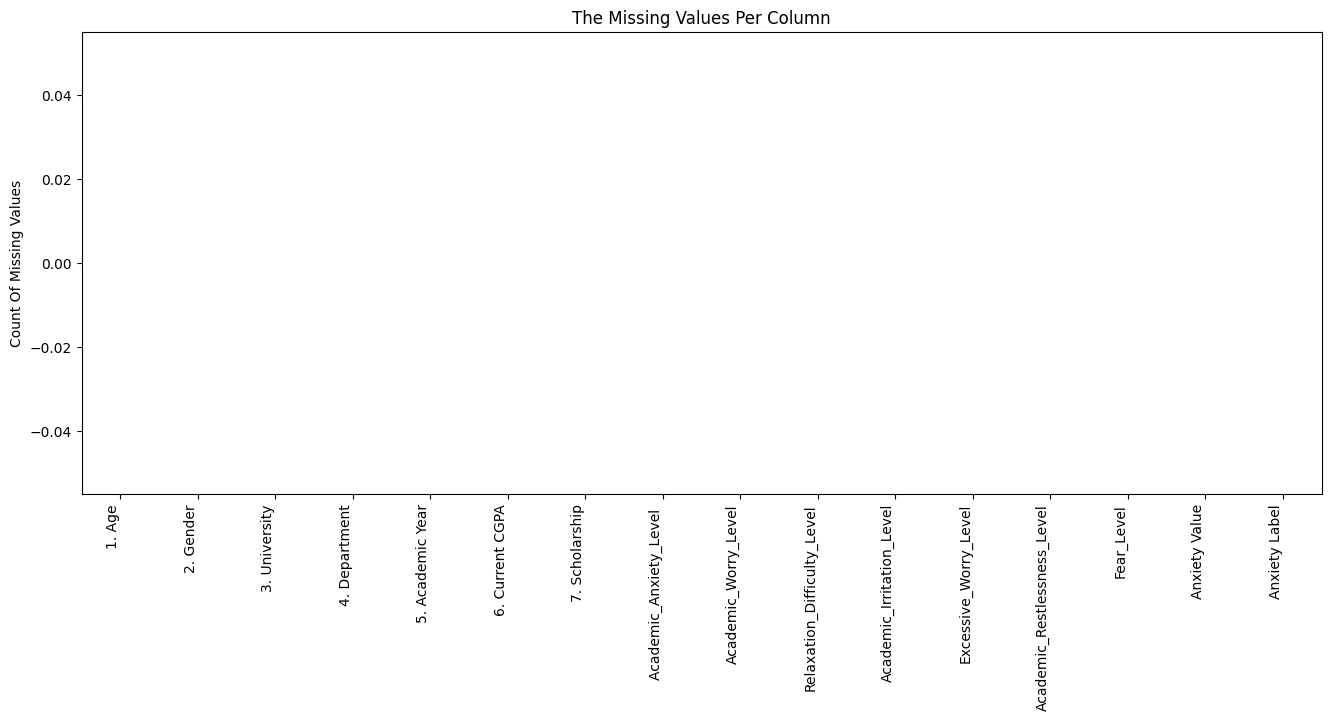

In [ ]:
plt.figure(figsize=(16,6))
missing.plot(kind='bar')
plt.title("The Missing Values Per Column")
plt.ylabel("Count Of Missing Values")
plt.xticks(rotation=90,ha='right')
plt.show()

The bar char show that **no** **missing** **values**. This indicates that the data is complete, and there is no need to apply any methods for handling missing values.

Anxiety Label
Severe Anxiety      744
Moderate Anxiety    620
Mild Anxiety        505
Minimal Anxiety     159
Name: count, dtype: int64


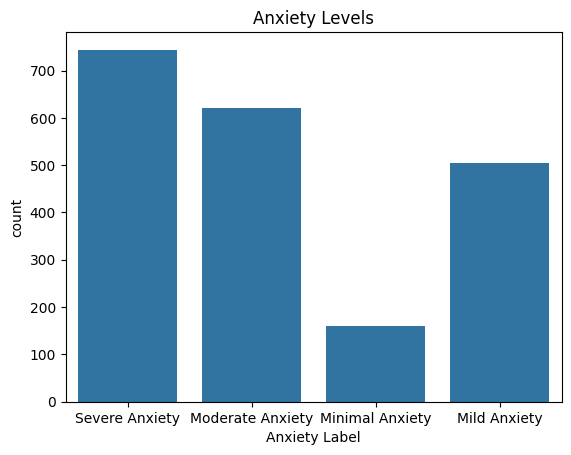

In [ ]:
print(df['Anxiety Label'].value_counts())
sns.countplot(data=df, x='Anxiety Label')
plt.title("Anxiety Levels")
plt.show()

The bar chart shows that (Severe Anxiety) is the most common category in the sample, followed by (Moderate) and (Mild) with (Minimal Anxiety) being the least. This indicates that higher anxiety levels dominate the dataset, which is important for understanding the problem and guiding the choice of analysis methods.

# **Five number summary**

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

five_num_summary = numeric_cols.describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]

print("Five Number Summary:")
five_num_summary

Five Number Summary:


,Academic_Anxiety_Level,Academic_Worry_Level,Relaxation_Difficulty_Level,Academic_Irritation_Level,Excessive_Worry_Level,Academic_Restlessness_Level,Fear_Level,Anxiety Value
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0
50%,2.0,2.0,2.0,2.0,2.0,2.0,2.0,13.0
75%,3.0,3.0,3.0,3.0,3.0,3.0,3.0,17.0
max,3.0,3.0,3.0,3.0,3.0,3.0,3.0,21.0


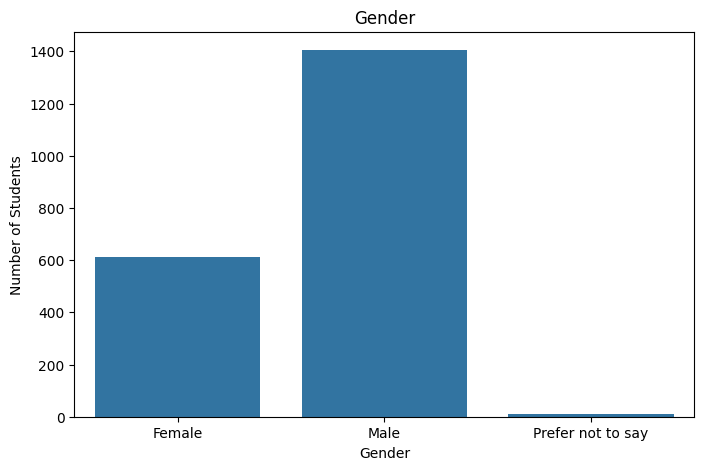

In [ ]:
label_counts = df.groupby(['2. Gender']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(data=label_counts, x='2. Gender', y='Count')

plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()




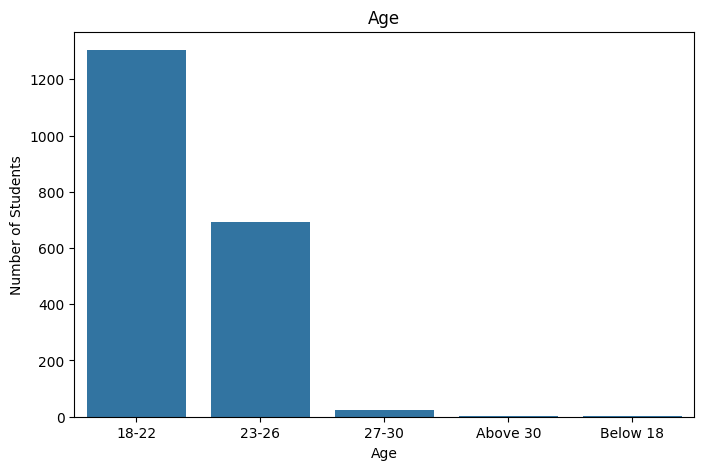

In [ ]:
label_counts = df.groupby(['1. Age']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(data=label_counts, x='1. Age', y='Count')

plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.show()




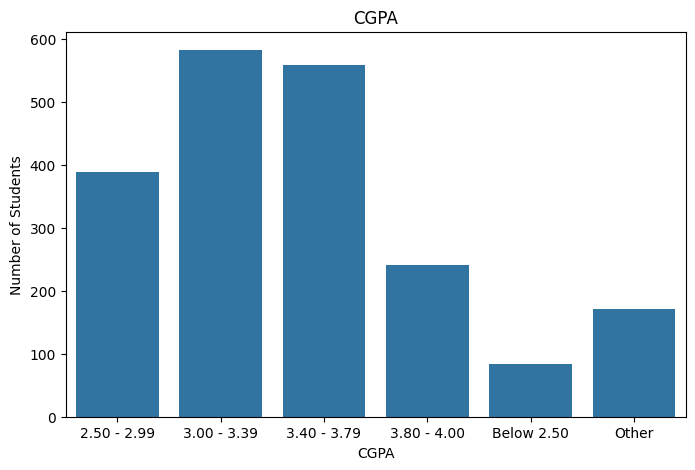

In [ ]:
label_counts = df.groupby(['6. Current CGPA']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(data=label_counts, x='6. Current CGPA', y='Count')

plt.title('CGPA')
plt.xlabel('CGPA')
plt.ylabel('Number of Students')
plt.show()




## **Outliers**

In [ ]:

numeric_cols = df.select_dtypes(include=['int64', 'float64'])

def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data < lower) | (data > upper)]
    return outliers, lower, upper

for col in numeric_cols.columns:
    outliers, lower, upper = find_outliers_iqr(df[col])
    print(f"\n🔹 Column: {col}")
    print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    if not outliers.empty:
        print(outliers.values)



🔹 Column: Academic_Anxiety_Level 
Lower bound: -2.00, Upper bound: 6.00
Number of outliers: 0

🔹 Column: Academic_Worry_Level
Lower bound: -2.00, Upper bound: 6.00
Number of outliers: 0

🔹 Column: Relaxation_Difficulty_Level
Lower bound: -2.00, Upper bound: 6.00
Number of outliers: 0

🔹 Column: Academic_Irritation_Level
Lower bound: -2.00, Upper bound: 6.00
Number of outliers: 0

🔹 Column: Excessive_Worry_Level
Lower bound: -2.00, Upper bound: 6.00
Number of outliers: 0

🔹 Column: Academic_Restlessness_Level
Lower bound: -2.00, Upper bound: 6.00
Number of outliers: 0

🔹 Column: Fear_Level
Lower bound: -2.00, Upper bound: 6.00
Number of outliers: 0

🔹 Column: Anxiety Value
Lower bound: -5.50, Upper bound: 30.50
Number of outliers: 0


The results show there are **no outliers** in the numeric columns. This means all values are within the normal range. It helps in preprocessing because we don’t need to clean or remove any extreme values, so the data is already consistent and ready for analysis.

## **Boxplot of Numeric Columns**

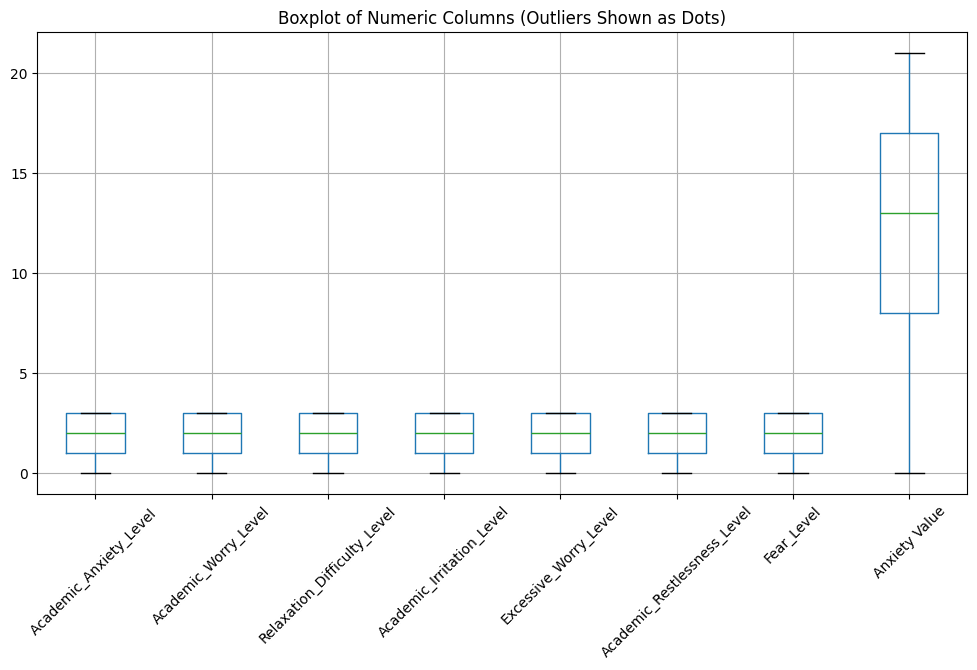

In [ ]:

plt.figure(figsize=(12, 6))
numeric_cols.boxplot()
plt.title("Boxplot of Numeric Columns (Outliers Shown as Dots)")
plt.xticks(rotation=45)
plt.show()

The boxplot shows the spread of values for all numeric columns. Most variables have similar ranges and medians close to the center, while the Anxiety Value column has a wider range.



## **Bar Chart of Anxiety Label by Gender**

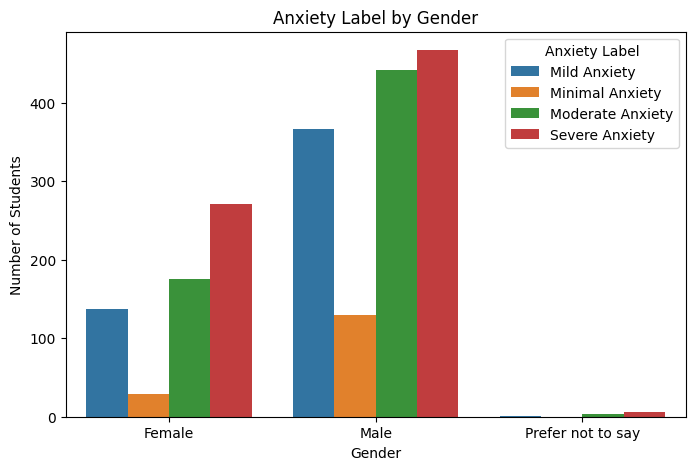

In [ ]:
import matplotlib.pyplot as plt


label_counts = df.groupby(['2. Gender', 'Anxiety Label']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(data=label_counts, x='2. Gender', y='Count', hue='Anxiety Label')

plt.title('Anxiety Label by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.legend(title='Anxiety Label')
plt.show()




The chart shows how anxiety levels change between males and females. Males have higher anxiety levels than females. This helps in preprocessing because it shows the data is not balanced, so we might need to fix that before using it.

## **Heatmap of Numerical Columns**

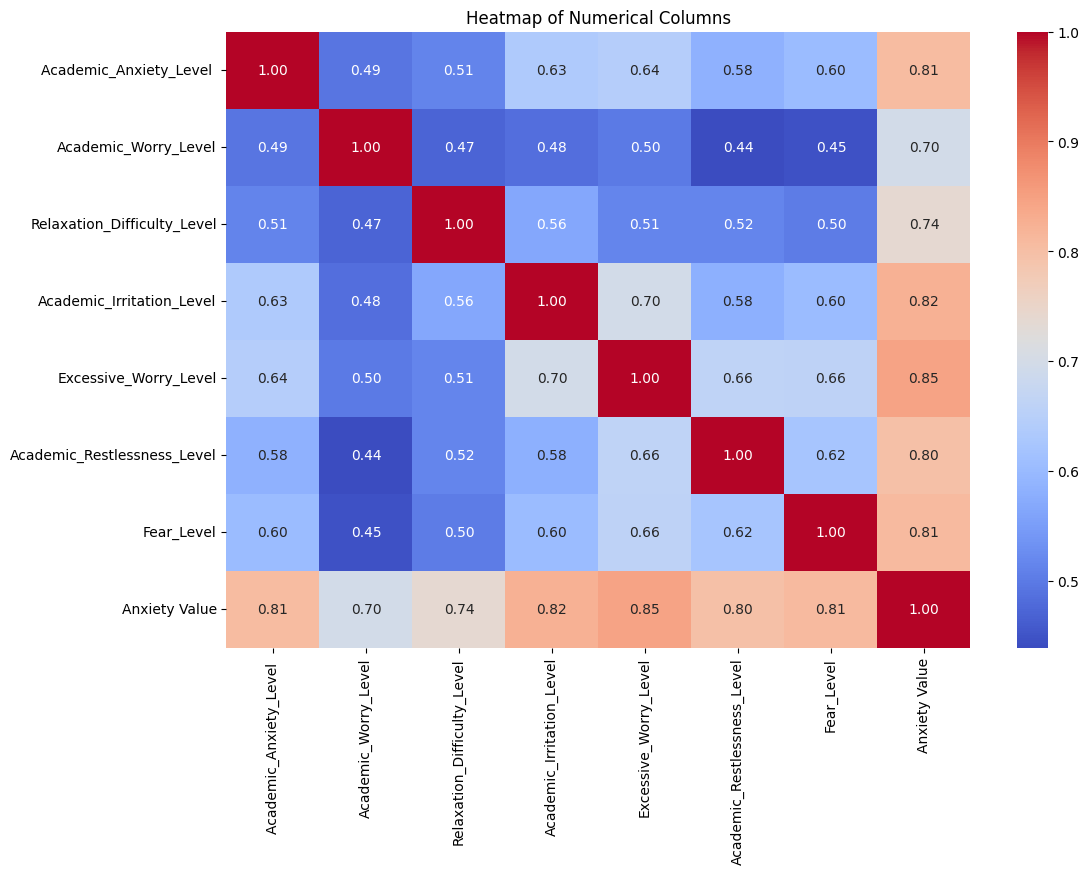

In [ ]:
numeric_cols = df.select_dtypes(include='number')

corr = numeric_cols.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

The heatmap shows strong correlations between variables, meaning some features are redundant and need preprocessing.




## **Histogram of Anxiety Value by Gender**

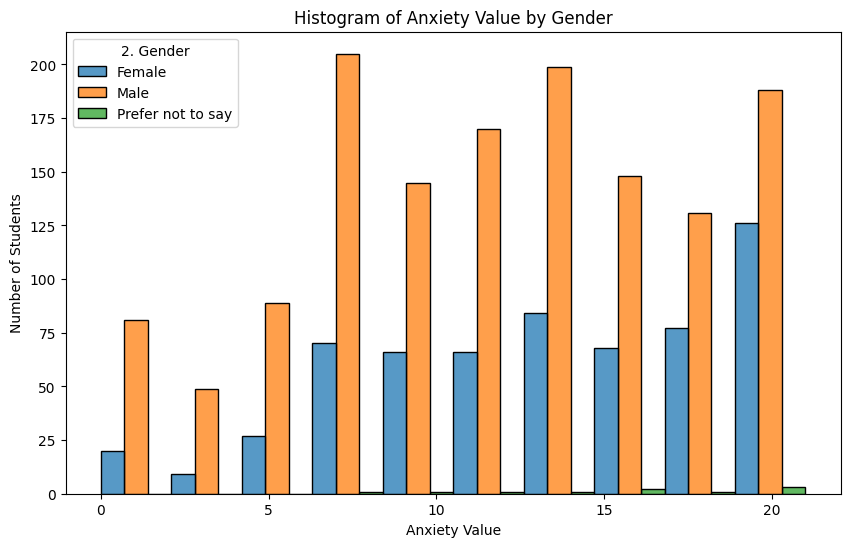

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Anxiety Value', hue='2. Gender', bins=10, multiple='dodge', edgecolor='black')

plt.title('Histogram of Anxiety Value by Gender')
plt.xlabel('Anxiety Value')
plt.ylabel('Number of Students')
plt.show()

The histogram shows females have higher anxiety values than males, with very few in “Prefer not to say.” This imbalance indicates the need for data preprocessing.


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

preprocessed_df = df.copy()

missing_counts = preprocessed_df.isna().sum().sort_values(ascending=False)
print("Missing values per column (should be 0):")
print(missing_counts.head(12))
print("\nTotal missing:", missing_counts.sum())

Missing values per column (should be 0):
1. Age                         0
2. Gender                      0
3. University                  0
4. Department                  0
5. Academic Year               0
6. Current CGPA                0
7. Scholarship                 0
Academic_Anxiety_Level         0
Academic_Worry_Level           0
Relaxation_Difficulty_Level    0
Academic_Irritation_Level      0
Excessive_Worry_Level          0
dtype: int64

Total missing: 0


In [ ]:
preprocessed_df['Anxiety Value'] = np.log1p(preprocessed_df['Anxiety Value'])

Variable transformation (log1p) was applied on Anxiety Value to reduce skewness and make the distribution more normal.

In [ ]:
cgpa_map = {
    '0.00 - 1.99': 1,
    '2.00 - 2.49': 2,
    '2.50 - 2.99': 3,
    '3.00 - 3.39': 4,
    '3.40 - 3.79': 5,
    '3.80 - 4.00': 6
}
preprocessed_df['CGPA_Level'] = preprocessed_df['6. Current CGPA'].map(cgpa_map)

year_map = {
    'First Year or Equivalent': 1,
    'Second Year or Equivalent': 2,
    'Third Year or Equivalent': 3,
    'Fourth Year or Equivalent': 4,
    'Fifth Year or Equivalent': 5
}
preprocessed_df['Year_Level'] = preprocessed_df['5. Academic Year'].map(year_map)

preprocessed_df[['6. Current CGPA', 'CGPA_Level', '5. Academic Year', 'Year_Level']].head()

,6. Current CGPA,CGPA_Level,5. Academic Year,Year_Level
0,2.50 - 2.99,3.0,Second Year or Equivalent,2.0
1,3.00 - 3.39,4.0,Third Year or Equivalent,3.0
2,3.00 - 3.39,4.0,Third Year or Equivalent,3.0
3,3.00 - 3.39,4.0,Third Year or Equivalent,3.0
4,2.50 - 2.99,3.0,Second Year or Equivalent,2.0


**Discretization** was used to transform ordinal text ranges (CGPA and Academic Year) into numeric ordered values.

This makes it easier for the model to understand and compare these attributes.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

preprocessed_df.columns = preprocessed_df.columns.str.strip()

numeric_cols = [
    'Academic_Anxiety_Level',
    'Academic_Worry_Level',
    'Relaxation_Difficulty_Level',
    'Academic_Irritation_Level',
    'Excessive_Worry_Level',
    'Academic_Restlessness_Level',
    'Fear_Level',
    'Anxiety Value']

scaler = MinMaxScaler()
preprocessed_df[numeric_cols] = scaler.fit_transform(preprocessed_df[numeric_cols])

preprocessed_df[numeric_cols].head()


,Academic_Anxiety_Level,Academic_Worry_Level,Relaxation_Difficulty_Level,Academic_Irritation_Level,Excessive_Worry_Level,Academic_Restlessness_Level,Fear_Level,Anxiety Value
0,0.666667,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.896975
1,0.333333,0.666667,0.666667,0.333333,0.333333,1.000000,0.666667,0.829801
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.666667,0.775756
4,1.000000,0.000000,1.000000,1.000000,0.333333,0.333333,1.000000,0.876096


**Normalization** was applied to numeric attributes to scale all values between 0 and 1.

This ensures consistency across features and improves model performance.

In [ ]:
Q1 = preprocessed_df['Anxiety Value'].quantile(0.25)
Q3 = preprocessed_df['Anxiety Value'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

preprocessed_df['Anxiety Value'] = preprocessed_df['Anxiety Value'].clip(lower, upper)

print("After noise removal:")
print("Min:", preprocessed_df['Anxiety Value'].min())
print("Max:", preprocessed_df['Anxiety Value'].max())


After noise removal:
Min: 0.3744703684799645
Max: 0.9999999999999999


Outliers were handled using the Interquartile Range (IQR) method.
Extreme values in Anxiety Value were clipped within the normal range to reduce noise while keeping all records.

In [ ]:
print("Raw dataset sample:")
display(df.head())

print("Preprocessed dataset sample:")
display(preprocessed_df.head())

Raw dataset sample:


,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Scholarship,Academic_Anxiety_Level,Academic_Worry_Level,Relaxation_Difficulty_Level,Academic_Irritation_Level,Excessive_Worry_Level,Academic_Restlessness_Level,Fear_Level,Anxiety Value,Anxiety Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,2,2,3,2,2,2,2,15,Severe Anxiety
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,1,2,2,1,1,3,2,12,Moderate Anxiety
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0,0,0,0,0,0,0,0,Minimal Anxiety
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,2,1,1,1,2,1,2,10,Moderate Anxiety
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,3,0,3,3,1,1,3,14,Moderate Anxiety


Preprocessed dataset sample:


,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Scholarship,Academic_Anxiety_Level,Academic_Worry_Level,Relaxation_Difficulty_Level,Academic_Irritation_Level,Excessive_Worry_Level,Academic_Restlessness_Level,Fear_Level,Anxiety Value,Anxiety Label,CGPA_Level,Year_Level
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,0.666667,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.896975,Severe Anxiety,3.0,2.0
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0.333333,0.666667,0.666667,0.333333,0.333333,1.000000,0.666667,0.829801,Moderate Anxiety,4.0,3.0
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.374470,Minimal Anxiety,4.0,3.0
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.666667,0.775756,Moderate Anxiety,4.0,3.0
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,1.000000,0.000000,1.000000,1.000000,0.333333,0.333333,1.000000,0.876096,Moderate Anxiety,3.0,2.0


The snapshot shows the dataset before and after preprocessing.
The preprocessed data includes transformed, discretized, normalized, and cleaned features ready for modeling.

In [ ]:
preprocessed_df.to_csv("Preprocessed_dataset.csv", index=False)
print("Saved as Preprocessed_dataset.csv")

Saved as Preprocessed_dataset.csv


The preprocessed dataset is saved as Preprocessed_dataset.csv and will be used in the next phase for model training and evaluation.